In [9]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

### This is a binary classification model issue, so in the last layer I added one neuron with a sigmoid activation function.

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics = ['acc'])

### Upload your folders of train and validation images in colab

In [ ]:
!unzip /content/train.zip

In [ ]:
!unzip /content/validation.zip

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/train", target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory("/content/validation", target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
memoryM = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
100/100 [==============================] - 78s 771ms/step - loss: 0.6924 - acc: 0.5240 - val_loss: 0.6727 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 76s 763ms/step - loss: 0.6619 - acc: 0.5910 - val_loss: 0.6378 - val_acc: 0.6280
Epoch 3/30
100/100 [==============================] - 77s 767ms/step - loss: 0.6184 - acc: 0.6560 - val_loss: 0.6494 - val_acc: 0.5870
Epoch 4/30
100/100 [==============================] - 77s 769ms/step - loss: 0.5836 - acc: 0.6805 - val_loss: 0.5778 - val_acc: 0.6980
Epoch 5/30
100/100 [==============================] - 77s 769ms/step - loss: 0.5419 - acc: 0.7215 - val_loss: 0.5639 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 77s 772ms/step - loss: 0.5113 - acc: 0.7385 - val_loss: 0.5646 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 77s 770ms/step - loss: 0.4900 - acc: 0.7655 - val_loss: 0.5561 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 7

### Let's plot the history of our memoryM model

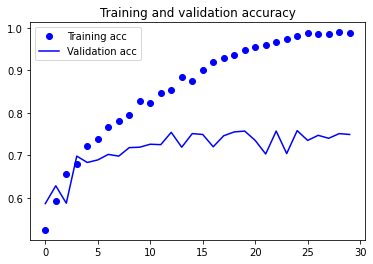

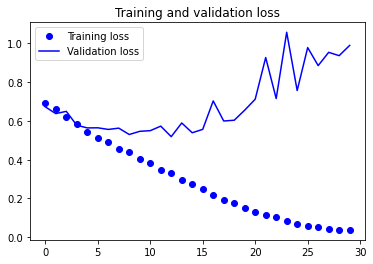

In [17]:
import matplotlib.pyplot as plt
acc = memoryM.history['acc']
val_acc = memoryM.history['val_acc']
loss = memoryM.history['loss']
val_loss = memoryM.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()